# 심층신경망
# DNN (Deep Neural Network)
----
#### 모델 저장 : 'DNN_winningRate_model.h5'


In [1]:
!pip install -q pyyaml h5py

In [2]:
# Import Library
from google.colab import drive
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math
import random
import os
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# 구글 드라이브 코랩이랑 연동하기
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# xData 불러오기
xData_path = "/content/drive/MyDrive/2022_AI_Web_Hackathon/Data/Data_Processing_xData.csv"
xData = pd.read_csv(xData_path, encoding="CP949")
xData = xData.drop(['Unnamed: 0'], axis=1)
xData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9
0,2.37,4.41,-1.62,3.34,5.30,0.61,0.15,-1.28,-1.43,0.33,6.35,1.89,2.63,6.90,8.96,2.20,2.37,-0.47,4.09,-0.01
1,0.09,3.52,0.84,4.46,11.73,0.76,2.19,0.85,0.25,1.03,1.64,1.94,1.34,6.13,-0.41,0.01,1.85,5.51,0.00,2.93
2,0.36,NaN,1.51,4.68,5.25,1.58,-0.53,-0.50,0.78,-0.21,3.28,4.73,3.35,3.34,5.05,-2.16,7.03,-1.02,2.88,-0.87
3,1.58,0.99,-1.84,1.76,1.30,2.29,-0.46,-0.22,1.44,1.80,3.12,6.93,2.11,7.05,5.28,3.30,3.97,1.89,0.55,2.08
4,7.18,2.87,1.33,2.91,-0.56,-0.63,-0.78,-0.24,-0.29,-1.04,3.72,2.51,-2.04,2.50,0.58,0.31,3.68,1.27,-1.03,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,1.75,1.56,0.70,0.62,2.08,2.86,0.49,-0.58,-0.20,-1.06,4.83,0.63,2.26,4.61,0.78,1.02,-0.30,-0.08,0.57,1.39
5445,3.56,1.95,2.26,2.61,2.06,1.59,1.38,-0.22,0.29,0.23,1.59,2.24,0.35,1.39,0.96,-0.37,0.57,0.09,-0.17,-0.04
5446,1.28,2.62,3.45,3.09,3.52,1.22,0.10,-0.41,0.05,-0.27,-1.35,1.55,0.70,4.54,1.94,0.05,-0.07,-0.38,-0.14,-0.47
5447,3.81,3.04,0.57,2.63,1.75,-0.45,1.05,-0.30,-0.65,-0.69,2.00,1.13,-0.20,0.31,2.97,2.45,1.44,1.31,0.84,0.59


In [5]:
# xData nan 값을 해당하는 열의 평균값으로 변경하기
xData_column = ['A0','A1','A2','A3','A4','A5','A6','A7','A8','A9','H0','H1','H2','H3','H4','H5','H6','H7','H8','H9']
nanCheck = 0
for i in range(len(xData)):
    for column in xData_column:
        if math.isnan(xData[column][i]):
            xData[column][i] = round(xData[column].mean(), 2)
            nanCheck += 1
print('%d 개의 nan 값을 각 열의 평균값으로 변경 완료했습니다.' %nanCheck)
xData

130 개의 nan 값을 각 열의 평균값으로 변경 완료했습니다.


,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9
0,2.37,4.41,-1.62,3.34,5.30,0.61,0.15,-1.28,-1.43,0.33,6.35,1.89,2.63,6.90,8.96,2.20,2.37,-0.47,4.09,-0.01
1,0.09,3.52,0.84,4.46,11.73,0.76,2.19,0.85,0.25,1.03,1.64,1.94,1.34,6.13,-0.41,0.01,1.85,5.51,0.00,2.93
2,0.36,2.00,1.51,4.68,5.25,1.58,-0.53,-0.50,0.78,-0.21,3.28,4.73,3.35,3.34,5.05,-2.16,7.03,-1.02,2.88,-0.87
3,1.58,0.99,-1.84,1.76,1.30,2.29,-0.46,-0.22,1.44,1.80,3.12,6.93,2.11,7.05,5.28,3.30,3.97,1.89,0.55,2.08
4,7.18,2.87,1.33,2.91,-0.56,-0.63,-0.78,-0.24,-0.29,-1.04,3.72,2.51,-2.04,2.50,0.58,0.31,3.68,1.27,-1.03,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5444,1.75,1.56,0.70,0.62,2.08,2.86,0.49,-0.58,-0.20,-1.06,4.83,0.63,2.26,4.61,0.78,1.02,-0.30,-0.08,0.57,1.39
5445,3.56,1.95,2.26,2.61,2.06,1.59,1.38,-0.22,0.29,0.23,1.59,2.24,0.35,1.39,0.96,-0.37,0.57,0.09,-0.17,-0.04
5446,1.28,2.62,3.45,3.09,3.52,1.22,0.10,-0.41,0.05,-0.27,-1.35,1.55,0.70,4.54,1.94,0.05,-0.07,-0.38,-0.14,-0.47
5447,3.81,3.04,0.57,2.63,1.75,-0.45,1.05,-0.30,-0.65,-0.69,2.00,1.13,-0.20,0.31,2.97,2.45,1.44,1.31,0.84,0.59


In [6]:
# xData에서 Away랑 Home의 순서를 바꿔 데이터 추가(X2)
xData_num = len(xData)
for i in range(xData_num):
    xData_insert = {
        "A0": xData["H0"][i], "A1": xData["H1"][i], "A2": xData["H2"][i], "A3": xData["H3"][i],
        "A4": xData["H4"][i], "A5": xData["H5"][i], "A6": xData["H6"][i], "A7": xData["H7"][i],
        "A8": xData["H8"][i], "A9": xData["H9"][i], "H0": xData["A0"][i], "H1": xData["A1"][i],
        "H2": xData["A2"][i], "H3": xData["A3"][i], "H4": xData["A4"][i], "H5": xData["A5"][i],
        "H6": xData["A6"][i], "H7": xData["A7"][i], "H8": xData["A8"][i], "H9": xData["A9"][i]
    }
    xData = xData.append(xData_insert, ignore_index=True)
xData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9
0,2.37,4.41,-1.62,3.34,5.30,0.61,0.15,-1.28,-1.43,0.33,6.35,1.89,2.63,6.90,8.96,2.20,2.37,-0.47,4.09,-0.01
1,0.09,3.52,0.84,4.46,11.73,0.76,2.19,0.85,0.25,1.03,1.64,1.94,1.34,6.13,-0.41,0.01,1.85,5.51,0.00,2.93
2,0.36,2.00,1.51,4.68,5.25,1.58,-0.53,-0.50,0.78,-0.21,3.28,4.73,3.35,3.34,5.05,-2.16,7.03,-1.02,2.88,-0.87
3,1.58,0.99,-1.84,1.76,1.30,2.29,-0.46,-0.22,1.44,1.80,3.12,6.93,2.11,7.05,5.28,3.30,3.97,1.89,0.55,2.08
4,7.18,2.87,1.33,2.91,-0.56,-0.63,-0.78,-0.24,-0.29,-1.04,3.72,2.51,-2.04,2.50,0.58,0.31,3.68,1.27,-1.03,-0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,4.83,0.63,2.26,4.61,0.78,1.02,-0.30,-0.08,0.57,1.39,1.75,1.56,0.70,0.62,2.08,2.86,0.49,-0.58,-0.20,-1.06
10894,1.59,2.24,0.35,1.39,0.96,-0.37,0.57,0.09,-0.17,-0.04,3.56,1.95,2.26,2.61,2.06,1.59,1.38,-0.22,0.29,0.23
10895,-1.35,1.55,0.70,4.54,1.94,0.05,-0.07,-0.38,-0.14,-0.47,1.28,2.62,3.45,3.09,3.52,1.22,0.10,-0.41,0.05,-0.27
10896,2.00,1.13,-0.20,0.31,2.97,2.45,1.44,1.31,0.84,0.59,3.81,3.04,0.57,2.63,1.75,-0.45,1.05,-0.30,-0.65,-0.69


In [7]:
# yData 불러오기
yData_path = "/content/drive/MyDrive/2022_AI_Web_Hackathon/Data/Data_Processing_yData.csv"
yData = pd.read_csv(yData_path, encoding="CP949")
yData = yData.drop(['Unnamed: 0'], axis=1)
yData

,Result
0,0
1,0
2,0
3,0
4,0
...,...
5444,0
5445,1
5446,1
5447,1


In [8]:
# yData에서 Away랑 Home의 순서를 바꿔 데이터 추가(X2)
yData_num = len(yData)
for i in range(yData_num):
    if str(yData["Result"][i]) == '0':
        new_result = 1
    else:
        new_result = 0
    yData_insert = {
        "Result": new_result
    }
    yData = yData.append(yData_insert, ignore_index=True)
yData

,Result
0,0
1,0
2,0
3,0
4,0
...,...
10893,1
10894,0
10895,0
10896,0


In [9]:
# xData yData 의 values 확인하기
print('xData.values')
print(xData.values)

print('\nyData.values')
print(yData.values)

xData.values
[[ 2.37  4.41 -1.62 ... -0.47  4.09 -0.01]
 [ 0.09  3.52  0.84 ...  5.51  0.    2.93]
 [ 0.36  2.    1.51 ... -1.02  2.88 -0.87]
 ...
 [-1.35  1.55  0.7  ... -0.41  0.05 -0.27]
 [ 2.    1.13 -0.2  ... -0.3  -0.65 -0.69]
 [ 1.2   1.01  0.35 ...  0.11  0.3  -0.22]]

yData.values
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [10]:
# (train / validation / test) dataset 설정
x_train_val, x_test, y_train_val, y_test = train_test_split(xData, yData, test_size=0.05, random_state=1)
val_split_num = len(x_train_val) - (len(x_test))

x_train = x_train_val[:val_split_num]
x_valid = x_train_val[val_split_num:]
y_train = y_train_val[:val_split_num]
y_valid = y_train_val[val_split_num:]

print("x_train =", x_train.shape, type(x_train))
print("y_train =", y_train.shape, type(y_test))
print("\nx_valid =", x_valid.shape, type(x_valid))
print("y_valid =", y_valid.shape, type(y_valid))
print("\nx_test  =", x_test.shape, type(x_test))
print("y_test  =", y_test.shape, type(y_test))

x_train = (9808, 20) <class 'pandas.core.frame.DataFrame'>
y_train = (9808, 1) <class 'pandas.core.frame.DataFrame'>

x_valid = (545, 20) <class 'pandas.core.frame.DataFrame'>
y_valid = (545, 1) <class 'pandas.core.frame.DataFrame'>

x_test  = (545, 20) <class 'pandas.core.frame.DataFrame'>
y_test  = (545, 1) <class 'pandas.core.frame.DataFrame'>


In [11]:
# DNN model 설정하기
input_shape = [x_train.shape[1]]
dense1 = keras.layers.Dense(100, activation='relu', input_shape=input_shape)
dense2 = keras.layers.Dense(100, activation='relu')
dense3 = keras.layers.Dense(10, activation='relu')
dense4 = keras.layers.Dense(1, activation='sigmoid')

model = keras.Sequential([dense1, dense2, dense3, dense4])

adam = keras.optimizers.Adam(learning_rate=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2100      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 13,221
Trainable params: 13,221
Non-trainable params: 0
_________________________________________________________________


In [12]:
# DNN 실행하기
batch = 100
epoch = 2000

early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 30, mode = 'auto')

hist = model.fit(
    x_train, y_train,
    epochs = epoch,
    batch_size = batch,
    validation_data = (x_valid, y_valid),
    validation_batch_size = batch,
    callbacks = [early_stopping]
    )

Epoch 1/2000
99/99 [==============================] - 4s 5ms/step - loss: 0.8009 - accuracy: 0.4883 - val_loss: 0.8093 - val_accuracy: 0.4954
Epoch 2/2000
99/99 [==============================] - 0s 3ms/step - loss: 0.7934 - accuracy: 0.4887 - val_loss: 0.8015 - val_accuracy: 0.4917
Epoch 3/2000
99/99 [==============================] - 0s 3ms/step - loss: 0.7865 - accuracy: 0.4881 - val_loss: 0.7944 - val_accuracy: 0.4899
Epoch 4/2000
99/99 [==============================] - 0s 3ms/step - loss: 0.7801 - accuracy: 0.4880 - val_loss: 0.7876 - val_accuracy: 0.4862
Epoch 5/2000
99/99 [==============================] - 0s 3ms/step - loss: 0.7742 - accuracy: 0.4871 - val_loss: 0.7813 - val_accuracy: 0.4917
Epoch 6/2000
99/99 [==============================] - 0s 3ms/step - loss: 0.7689 - accuracy: 0.4859 - val_loss: 0.7757 - val_accuracy: 0.4917
Epoch 7/2000
99/99 [==============================] - 0s 3ms/step - loss: 0.7639 - accuracy: 0.4873 - val_loss: 0.7704 - val_accuracy: 0.4936
Epoch 

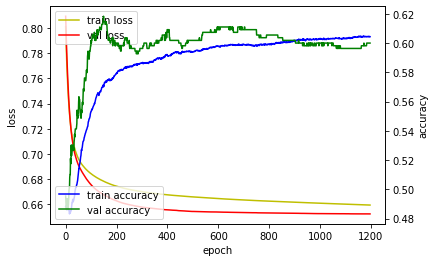

In [13]:
# train loss / valid loss / train accuracy / valid accuracy 확인하기
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')
plt.show()

In [14]:
# DNN model accuracy & loss 확인하기
performance = model.evaluate(x_test, y_test, batch_size=1, verbose=1)
print('Accuracy :', performance[1], '\nLoss :', performance[0])

545/545 [==============================] - 2s 2ms/step - loss: 0.6441 - accuracy: 0.6220
Accuracy : 0.6220183372497559 
Loss : 0.6440966129302979


In [15]:
# DNN model 저장하기
model.save('./DNN_winlose_model.h5')

In [16]:
!pip install --upgrade tensorflowjs==3.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 


In [18]:
 ! pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import tensorflow as tf
import tensorflowjs as tfjs

In [20]:
tfjs.converters.save_keras_model(model, 'models')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')